<a href="https://colab.research.google.com/github/TAKE-JP-17/Pytorch/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Convert MNIST Image Files into a Tensor of 4-Dimensions(# Numbers of Images, Height, Width, Color Channels)
transform = transforms.ToTensor() # We are transforming our images into a tensor

In [3]:
# Train Data
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)
# 1.root:指定數據集的根目錄
# 2.'/cnn_data':是數據集存儲的路徑
# 3.訓練集:(train=True) 測試集:(train=False)
# 4.download=True:如果本地沒有找到數據集，這個參數設定會自動從網絡下載數據集並存儲到指定的 root 目錄中。如果數據集已經存在，則不會再次下載。

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15481610.90it/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 462927.75it/s]


Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3631849.55it/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2243878.54it/s]

Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [4]:
# Test Data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
# Create a small batch size for images...let's say 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True) # shuffle=True:告訴 DataLoader 在每個 epoch 開始之前將數據集中的樣本隨機打亂。
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [8]:
# Define our CNN Model
# Describe convolutional layer and what it's doing(2 convolutional layers)
# This is just an example in the next video we'll build out the actual model
conv1 = nn.Conv2d(1,6,3,1) # 1 input, 6 output, 3 kernel size, stride it just 1 at a time
conv2 = nn.Conv2d(6,16,3,1)

In [9]:
# Grab 1 MNIST record/image
for i, (X_Train,y_train) in enumerate(train_data):
  break

In [10]:
X_Train

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [11]:
X_Train.shape # Size of MNIST Data(pixels)

torch.Size([1, 28, 28])

In [12]:
# Change 2D image into 4D batch
x = X_Train.view(1,1,28,28)

In [13]:
# Perform our first convolution
x = F.relu(conv1(x)) # Rectified Linear Unit for our activation function

In [14]:
x

tensor([[[[0.2986, 0.2986, 0.2986,  ..., 0.2986, 0.2986, 0.2986],
          [0.2986, 0.2986, 0.2986,  ..., 0.2986, 0.2986, 0.2986],
          [0.2986, 0.2986, 0.2986,  ..., 0.2986, 0.2986, 0.2986],
          ...,
          [0.2986, 0.2986, 0.0848,  ..., 0.2986, 0.2986, 0.2986],
          [0.2986, 0.2986, 0.1854,  ..., 0.2986, 0.2986, 0.2986],
          [0.2986, 0.2986, 0.2986,  ..., 0.2986, 0.2986, 0.2986]],

         [[0.0149, 0.0149, 0.0149,  ..., 0.0149, 0.0149, 0.0149],
          [0.0149, 0.0149, 0.0149,  ..., 0.0149, 0.0149, 0.0149],
          [0.0149, 0.0149, 0.0149,  ..., 0.0149, 0.0149, 0.0149],
          ...,
          [0.0149, 0.0149, 0.0000,  ..., 0.0149, 0.0149, 0.0149],
          [0.0149, 0.0149, 0.1073,  ..., 0.0149, 0.0149, 0.0149],
          [0.0149, 0.0149, 0.0149,  ..., 0.0149, 0.0149, 0.0149]],

         [[0.2453, 0.2453, 0.2453,  ..., 0.2453, 0.2453, 0.2453],
          [0.2453, 0.2453, 0.2453,  ..., 0.2453, 0.2453, 0.2453],
          [0.2453, 0.2453, 0.2453,  ..., 0

In [15]:
# 1 single image, 6 is the filters we asked for
x.shape

torch.Size([1, 6, 26, 26])

In [16]:
# pass thru the pooling layer(take data away)
x = F.max_pool2d(x,2,2) # kernel(filter) of 2 and stride of 2(Stride = 2 表示每次滑動 2 個像素，這會使輸出特徵圖的寬度和高度減半。)


In [17]:
x.shape # 26 / 2 = 13

torch.Size([1, 6, 13, 13])

In [18]:
# Do our second convolutional layer
x = F.relu(conv2(x))

In [19]:
x.shape # Again, we didn't set padding so we lose 2 pixels around the outside of the image

torch.Size([1, 16, 11, 11])

In [20]:
# Pooling layer
x = F.max_pool2d(x,2,2)

In [21]:
x.shape # 11 / 2 = 5.5, but we have to round down because you can't invent data to round up

torch.Size([1, 16, 5, 5])

In [22]:
((28-2)/2-2)/2

5.5

In [23]:
# Model Class
class ConvolutionalNetwork(nn.Module):
  def __init__(self): # 構造函數（constructor）
    super().__init__() # 自動按照正確的順序調用各個父類的初始化方法，避免出現混亂或重複的初始化過程。
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    # Fully Connected Layer
    self.fc1 = nn.Linear(5*5*16, 120) # 120 neurons
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) # 2*2 kernel and stride 2
    # Second Pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2) # 2*2 kernel and stride 2

    # Re-View to flatten it out
    X = X.view(-1,16*5*5) # negative one so that we can vary the batch size 在 view 中，-1 是一個特殊的值，它表示 PyTorch 自動推斷這個維度的大小，以使總元素數量不變。這行代碼將 X 的形狀改變為 (batch_size, 400)，其中 400 是展平後的大小，batch_size 是保持不變的批次大小，即每個樣本現在是一個大小為 400 的一維向量。這樣做通常是為了準備將數據傳遞到全連接層中。








    # Fully Connected Layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1) # 這通常用於分類模型的輸出層，將輸出轉換為對數概率分佈，為後續的損失計算做準備。
    # define dimension=1 dim 參數 指定了 softmax 操作應該在哪個維度上應用。dim=1 表示在第二個維度（通常是特徵維度）上進行操作。對於形狀為 (batch_size, num_classes) 的張量，dim=1 意味著對每個樣本的所有類別得分應用 log_softmax。


In [24]:
# Create an Instance of our Model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [25]:
# 1.Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001) # Smaller the Learning Rate, longer its gonna take to train. Of course, Train will be better.

In [36]:
import time
start_time = time.time()

# Create Variables To Tracks Things
epochs = 5 # Train & Test 5 times
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For Loop of Epochs
for i in range(epochs):
 trn_corr = 0
 tst_corr = 0

 # Train
 for b,(X_train,y_train) in enumerate(train_loader):
  b+=1 # start our batches at 1
  y_pred = model(X_train) # get predicted values from the training set. Not flattened 2D
  loss = criterion(y_pred,y_train) # how off are we? Compare the predictions to correct answers in y_train

  predicted = torch.max(y_pred.data,1)[1] # add up the number of correct predictions. Indexed off the first point.
  # torch.max 用於在指定維度上找到最大值。這裡的 1 表示沿著第一個維度（通常是類別的維度）尋找最大值。
  # ,1):這個函數會返回兩個張量：第一個是每個樣本中最大值的張量，第二個是這些最大值所在的位置（即索引）。
  # [1]:表示選擇第二個輸出，即最大值所在的索引，這個索引代表模型預測的類別標籤。
  # predicted:最後，這個索引被賦值給變量 predicted，表示模型預測的類別標籤。
  batch_corr = (predicted == y_train).sum() # how many we got correct from this batch. True=1, False=0, sum those up.
  trn_corr += batch_corr # keep track as we go along in training.

  # Update our parameters
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Print out some results
  if b%600 == 0: # 檢查餘數是否為0/b % 600 == 0 意味著每當 batch 編號是 600 的倍數時，都會打印一次當前的訓練進度（包括 epoch 編號、batch 編號和損失值）。
    print(f'Epoch: {i} Batch: {b} Loss: {loss.item()}') # epoch（訓練輪次）數:i/batch（批次）編號 b/loss.item()(損失值)

  train_losses.append(loss)
  train_correct.append(trn_corr)

 # Test
 with torch.no_grad(): # No gradient so we don't update our weights and biases with test date
  for b,(X_test,y_test) in enumerate(test_loader):
    y_val = model(X_test)
    predicted = torch.max(y_val.data,1)[1] # Adding up correct predictions
    tst_corr += (predicted == y_test).sum() # T=1 F=0 and sum away
    # predicted == y_train:將預測的標籤 predicted 與實際的標籤 y_train 進行比較。這是一個逐元素的比較操作，返回一個布爾值的張量（或數組），其中每個元素是 True 或 False，對應於 predicted 和 y_train 在該位置上的值是否相等。
    # .sum():對於布爾張量，.sum() 方法將 True 視為 1，False 視為 0，並計算所有元素的總和。這樣就得到了預測正確的樣本數量。
    # batch_corr:變量 batch_corr 儲存了在當前批次中預測正確的樣本數量。


 loss = criterion(y_val,y_test)
 test_losses.append(loss)
 test_correct.append(tst_corr)



current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!')

Epoch: 0 Batch: 600 Loss: 0.023733172565698624
Epoch: 0 Batch: 1200 Loss: 0.003455493599176407
Epoch: 0 Batch: 1800 Loss: 0.0008372392621822655
Epoch: 0 Batch: 2400 Loss: 0.010705141350626945
Epoch: 0 Batch: 3000 Loss: 0.008078320883214474
Epoch: 0 Batch: 3600 Loss: 0.0011862406972795725
Epoch: 0 Batch: 4200 Loss: 0.038080841302871704
Epoch: 0 Batch: 4800 Loss: 0.0016068397089838982
Epoch: 0 Batch: 5400 Loss: 0.138673797249794
Epoch: 0 Batch: 6000 Loss: 0.2449204921722412
Epoch: 1 Batch: 600 Loss: 0.007151054684072733
Epoch: 1 Batch: 1200 Loss: 0.011097034439444542
Epoch: 1 Batch: 1800 Loss: 0.0017998721450567245
Epoch: 1 Batch: 2400 Loss: 0.0001049584461725317
Epoch: 1 Batch: 3000 Loss: 0.0031431831885129213
Epoch: 1 Batch: 3600 Loss: 0.003668801160529256
Epoch: 1 Batch: 4200 Loss: 0.0037249946035444736
Epoch: 1 Batch: 4800 Loss: 0.00015864608576521277
Epoch: 1 Batch: 5400 Loss: 0.0796482041478157
Epoch: 1 Batch: 6000 Loss: 0.0808732658624649
Epoch: 2 Batch: 600 Loss: 0.01409958861768

In [44]:
# Graph the loss at epoch
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()




AttributeError: 'float' object has no attribute 'item'

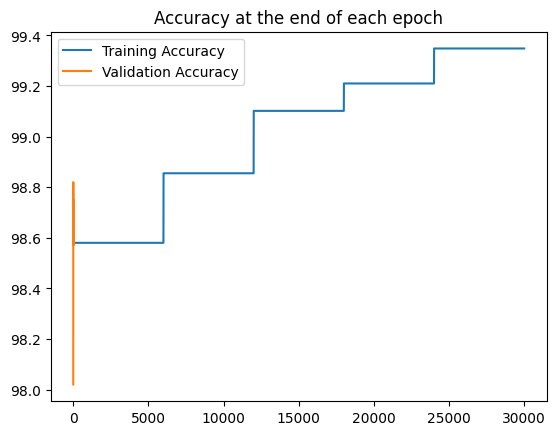

In [45]:
# graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at the end of each epoch")
plt.legend()


In [46]:
test_load_everything = DataLoader(test_data,batch_size=10000,shuffle=False)

In [47]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_model = model(X_test)
    predicted = torch.max(y_val,1)[1]
    correct += (predicted == y_test).sum()

RuntimeError: The size of tensor a (10) must match the size of tensor b (10000) at non-singleton dimension 0

In [48]:
# Did for correct
correct.item()/len(test_data)*100

AttributeError: 'int' object has no attribute 'item'